# Content
* [Project Description]
* [Step 1 Import Module]
* [Step 2 Import Datasets]
* [Step 3 Checking Datasets]
* [Step 4 Training and Testing Model]
    * [Step 4.1 Standard Scaler Function]
    * [Step 4.2 Region 1]
    * [Step 4.3 Region 2]
    * [Step 4.4 Region 3]
    * [Step 4.5 Analysis Result]
* [Step 5 Preparing for Calculating Profit]
* [Step 6 Calculating Profit]
* [Step 7 Calculating Risk and Profit for Every Regions]

# Project Description
In this project, we are tasked with finding a suitable location for drilling a new oil well. The steps to select a new location are as follows:
- Gather parameters for drilling oil wells in several selected regions: oil quality and oil reserve volume.
- Create a model capable of predicting the oil reserve volume in a new well.
- Choose the oil well with the highest estimated value.
- Select the region with the highest total profit for the selected oil well.

The data used is oil data from three regions. From this data, a model will be created to assist in the selection of a region.

# Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Import Datasets

In [2]:
try:
    df1 = pd.read_csv('D:\datasets\projek_9\geo_data_0.csv')
    df2 = pd.read_csv('D:\datasets\projek_9\geo_data_1.csv')
    df3 = pd.read_csv('D:\datasets\projek_9\geo_data_2.csv')
except:
    df1 = pd.read_csv('/datasets/geo_data_0.csv')
    df2 = pd.read_csv('/datasets/geo_data_1.csv')
    df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Based on the information provided, the data consists of four columns, namely:
- `id`: Unique ID for the oil well
- `f0`, `f1`, and `f2`: Three feature points (the specific meaning is not important, but the features themselves are significant)
- `product`: Oil reserve volume in the well (in thousands of barrels).

# Checking Dataset

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df1.duplicated().sum()

0

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df2.duplicated().sum()

0

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
df3.duplicated().sum()

0

**Based on the information provided:**
- There are no missing values in any column in each dataset. They all have the same number of rows, which is **10,000**.
- For the data types, each column has the appropriate data type.
- There are no missing values for each dataset. Therefore, we can proceed with further analysis of this data.

In [12]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [13]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [14]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


**Based on the information above:**
- Based on the average product values, df3 has the highest value, and df2 has the lowest value.
- In terms of standard deviation, df1 and df3 have standard deviations that are far from the mean value, indicating that the data in these datasets is less variable.
- In contrast, the standard deviation value in df2 is not too far from the mean, indicating that the product data in df2 is more variable.
- Therefore, we can tentatively conclude that the data in df2 is good because it has a wider range of values compared to df1 and df3.

In [15]:
df1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [16]:
df2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [17]:
df3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


**Based on the information above:**
In general, there is little to no correlation with all the features. However, for df2, the `f2` column has a high correlation with the `product` column.

In [18]:
columns = ['f0', 'f1', 'f2', 'product']
titles = ['f0', 'f1', 'f2', 'product']
def plot_hist(data):
    data.hist(column=columns, figsize=(10,10))

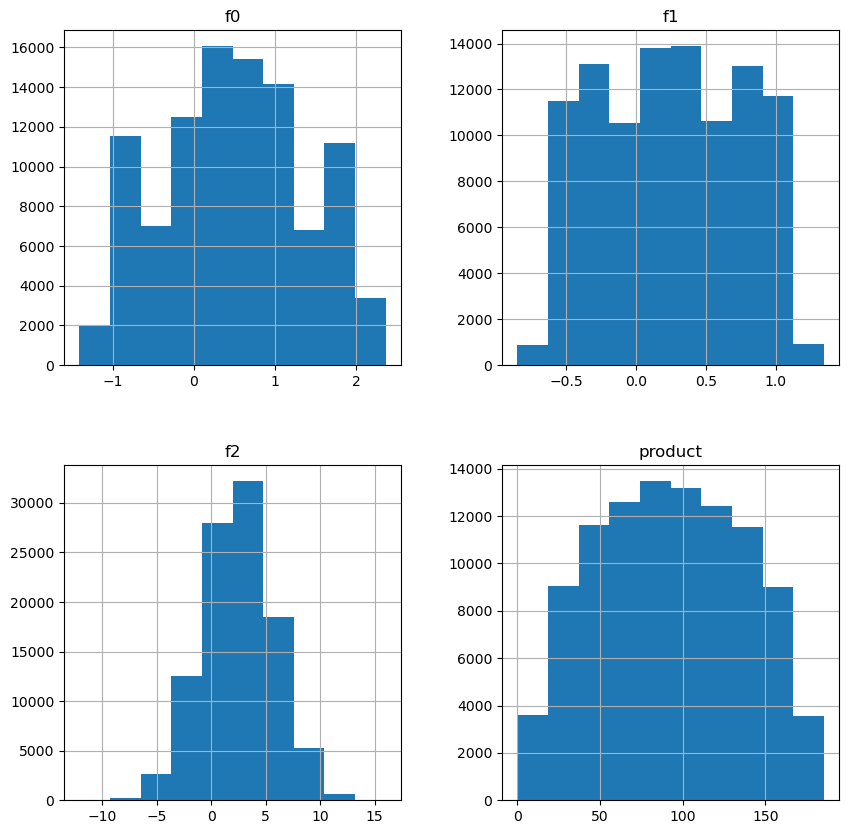

In [19]:
plot_hist(df1)

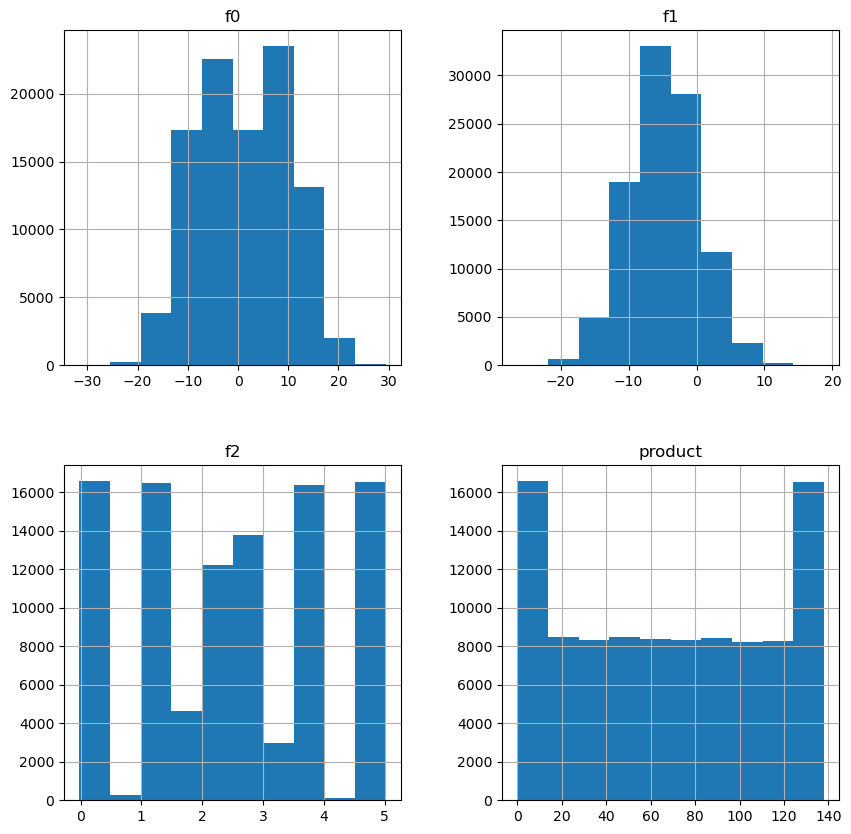

In [20]:
plot_hist(df2)

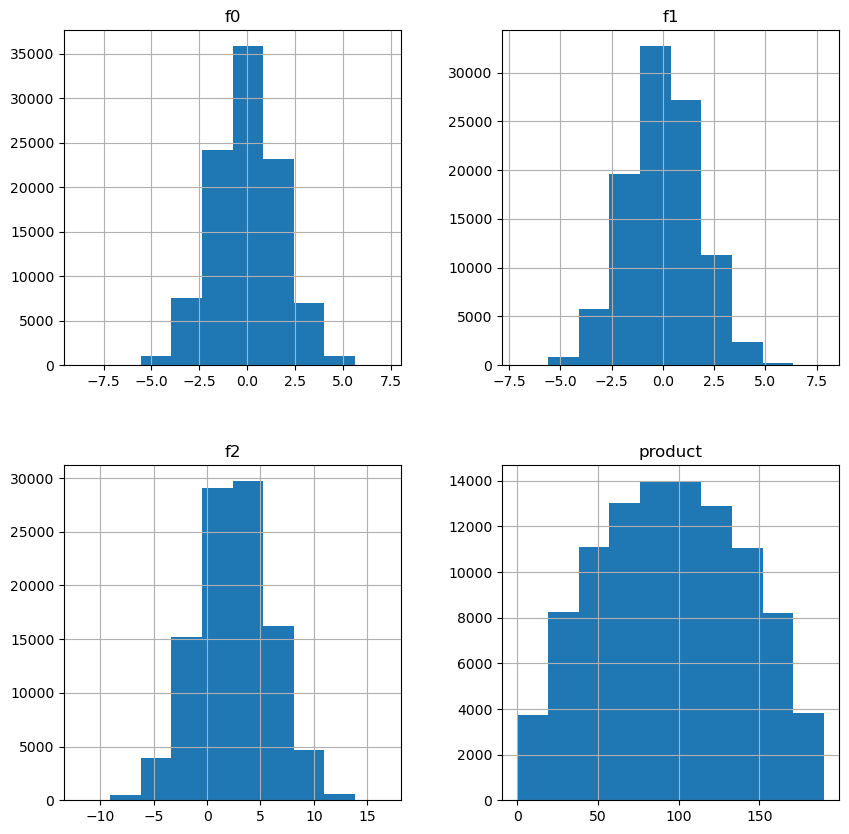

In [21]:
plot_hist(df3)

**Based on the information above:** From the given data, there are many outliers in the `f0`, `f1`, and `f2` columns. However, these data points cannot be removed because they represent the points of the well features. In the `product` column, there appear to be no outliers.

<AxesSubplot:>

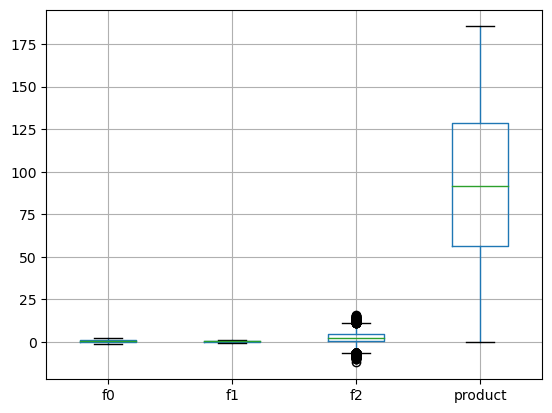

In [22]:
df1.boxplot()

<AxesSubplot:>

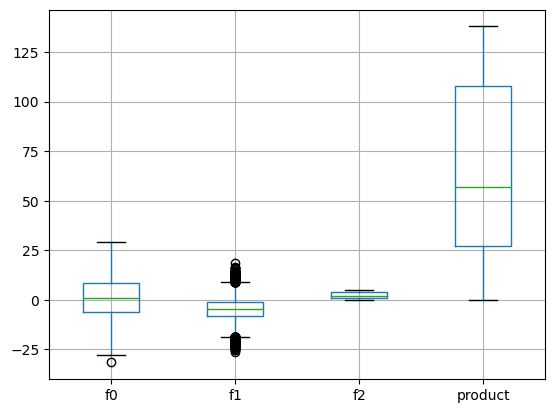

In [23]:
df2.boxplot()

<AxesSubplot:>

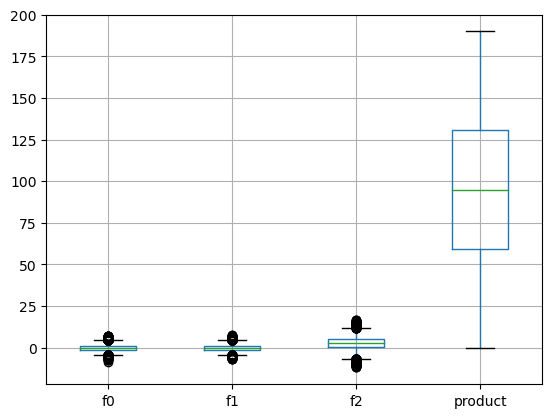

In [24]:
df3.boxplot()

**Based on the information above:** As we can see, there are many outliers in the three columns `f0`, `f1`, and `f2`. However, since these are well feature data, they cannot be removed.

# Training and Testing The Model

In [25]:
# Create an initial for model
model = LinearRegression()

## Standard Scaler Function

In [26]:
# function to apply standard scaler on numeric dataset
def standard_scaler(features_train, features_valid):
    scaler = StandardScaler()
    numeric = ['f0','f1','f2'] # tabel numerik
    scaler.fit(features_train[numeric]) 
    features_train[numeric] = scaler.transform(features_train[numeric]) # merubah tabel numerik dengan standard scaler
    features_valid[numeric] = scaler.transform(features_valid[numeric]) # merubah tabel numerik dengan standard scaler

This function is designed to apply standard scaling to numerical columns, standardizing features by removing the mean and scaling to unit variance. Instead of repeating the same code, this function is created for convenience.

## Region 1

In [27]:
# Creating features by removing the `id` and `product` columns
df1_features = df1.drop(['id', 'product'], axis=1)

In [28]:
# Creating the target by taking the `product` column
df1_target = df1['product']

In [29]:
# Splitting the data into training and validation sets with a 75:25 ratio
df1_features_train, df1_features_valid, df1_target_train, df1_target_valid = train_test_split(df1_features, df1_target, test_size=0.25, random_state=12345)

In [30]:
standard_scaler(df1_features_train, df1_features_valid)

In [31]:
df1_features_train.head()

,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865
70185,-1.837105,0.010321,-0.147634
82230,-1.299243,0.987558,1.273181


In [32]:
df1_features_valid.head()

,f0,f1,f2
71751,0.517917,-0.610097,-0.126226
80493,0.568391,-0.086063,-0.814914
2655,0.805688,-1.613289,-1.341342
53233,0.222503,-1.355437,-0.597275
91141,-0.087941,1.433113,-0.544588


The result of standard scaling makes the numerical data values have a similar range.

In [33]:
# Training the model
model.fit(df1_features_train, df1_target_train)

LinearRegression()

In [34]:
# predict the target using data valid
df1_predictions_valid = model.predict(df1_features_valid)

In [35]:
# Calculating the MSE
mse_geo1 = mean_squared_error(df1_target_valid, df1_predictions_valid)

In [36]:
# Calculating the average and the RMSE
print('Average:', df1_predictions_valid.mean())
print('RMSE:', mse_geo1**0.5)

Average: 92.59256778438035
RMSE: 37.5794217150813


## Region 2

In [37]:
# Creating features by removing the `id` and `product` columns
df2_features = df2.drop(['id', 'product'], axis=1)

In [38]:
# Creating the target by taking the `product` column
df2_target = df2['product']

In [39]:
# Splitting the data into training and validation sets with a 75:25 ratio
df2_features_train, df2_features_valid, df2_target_train, df2_target_valid = train_test_split(df2_features, df2_target, test_size=0.25, random_state=12345)

In [40]:
standard_scaler(df2_features_train, df2_features_valid)

In [41]:
df2_features_train.head()

,f0,f1,f2
27212,-0.850855,0.624428,0.296943
7866,1.971935,1.832275,0.294333
62041,1.079305,0.170127,-0.296418
70185,-1.512028,-0.887837,-0.880471
82230,-1.804775,-0.718311,-0.293255


In [42]:
df2_features_valid.head()

,f0,f1,f2
71751,-0.168616,0.571372,0.297471
80493,0.878384,-1.772903,-0.293901
2655,-0.852976,-0.004986,-0.876502
53233,1.496940,-1.146077,-0.294011
91141,0.552177,0.057961,-1.457764


The result of standard scaling makes the numerical data values have a similar range.

In [43]:
# Training the model
model.fit(df2_features_train, df2_target_train)

LinearRegression()

In [44]:
# predict the target using data valid
df2_predictions_valid = model.predict(df2_features_valid)

In [45]:
# calculating the MSE
mse_geo2 = mean_squared_error(df2_target_valid, df2_predictions_valid)

In [46]:
# calculating the average and the RMSE
print('Average:', df2_predictions_valid.mean())
print('RMSE:', mse_geo2**0.5)

Average: 68.728546895446
RMSE: 0.8930992867756168


## Region 3

In [47]:
# Creating features by removing the `id` and `product` columns
df3_features = df3.drop(['id', 'product'], axis=1)

In [48]:
# Creating the target by taking the `product` column
df3_target = df3['product']

In [49]:
# Splitting the data into training and validation sets with a 75:25 ratio
df3_features_train, df3_features_valid, df3_target_train, df3_target_valid = train_test_split(df3_features, df3_target, test_size=0.25, random_state=42)

In [50]:
standard_scaler(df3_features_train, df3_features_valid)

In [51]:
df3_features_train.head()

,f0,f1,f2
98980,-0.343864,-1.338311,0.817572
69824,-0.400431,0.993613,-1.102974
9928,1.004849,-0.923485,-0.576264
75599,-0.784031,0.571573,0.914886
95621,0.619771,0.681588,-0.429467


In [52]:
df3_features_valid.head()

,f0,f1,f2
75721,1.218275,-0.966868,0.175298
80184,0.423146,0.434841,0.336007
19864,-1.453162,0.490760,-2.136247
76699,-1.177130,-0.876338,0.739322
92991,1.583978,0.828733,-1.114918


Hasil dari standard scaler membuat jarak nilai data numerik menjadi tidak jauh.

In [53]:
# Training the model using train set
model.fit(df3_features_train, df3_target_train)

LinearRegression()

In [54]:
# Predict the target using data valid
df3_predictions_valid = model.predict(df3_features_valid)

In [55]:
# Calculating the MSE
mse_geo3 = mean_squared_error(df3_target_valid, df3_predictions_valid)

In [56]:
# Calculating the average and the RMSE
print('Average:', df3_predictions_valid.mean())
print('RMSE:', mse_geo3**0.5)

Average: 94.77102387765939
RMSE: 40.14587231134218


## Comparing The Result

### Region 1

In [57]:
# Creating a series and converting it into a DataFrame
df1_predicted_value = pd.Series(df1_predictions_valid)
df1_real_value = pd.Series(df1_target_valid)

In [58]:
df1_predicted_value = pd.DataFrame(df1_predicted_value).rename(columns={0:'predicted_value'}).reset_index(drop=True)
df1_real_value = pd.DataFrame(df1_real_value).rename(columns={'product':'real_value'}).reset_index(drop=True)

In [59]:
# Merging two dataframes and comparing the result
df1_predicted_value.join(df1_real_value)

,predicted_value,real_value
0,95.894952,10.038645
1,77.572583,114.551489
2,77.892640,132.603635
3,90.175134,169.072125
4,70.510088,122.325180
...,...,...
24995,103.037104,170.116726
24996,85.403255,93.632175
24997,61.509833,127.352259
24998,118.180397,99.782700


### Region 2

In [60]:
# Creating a series and converting it into a DataFrame
df2_predicted_value = pd.Series(df2_predictions_valid)
df2_real_value = pd.Series(df2_target_valid)

In [61]:
df2_predicted_value = pd.DataFrame(df2_predicted_value).rename(columns={0:'predicted_value'}).reset_index(drop=True)
df2_real_value = pd.DataFrame(df2_real_value).rename(columns={'product':'real_value'}).reset_index(drop=True)

In [62]:
# Merging two dataframes and comparing the result
df2_predicted_value.join(df2_real_value)

,predicted_value,real_value
0,82.663314,80.859783
1,54.431786,53.906522
2,29.748760,30.132364
3,53.552133,53.906522
4,1.243856,0.000000
...,...,...
24995,136.869211,137.945408
24996,110.693465,110.992147
24997,137.879341,137.945408
24998,83.761966,84.038886


### Region 3

In [63]:
# Creating a series and converting it into a DataFrame
df3_predicted_value = pd.Series(df3_predictions_valid)
df3_real_value = pd.Series(df3_target_valid)

In [64]:
df3_predicted_value = pd.DataFrame(df3_predicted_value).rename(columns={0:'predicted_value'}).reset_index(drop=True)
df3_real_value = pd.DataFrame(df3_real_value).rename(columns={'product':'real_value'}).reset_index(drop=True)

In [65]:
# Merging two dataframes and comparing the result
df3_predicted_value.join(df3_real_value)

,predicted_value,real_value
0,98.301916,117.441301
1,101.592461,47.841249
2,52.449099,45.883483
3,109.922127,139.014608
4,72.411847,84.004276
...,...,...
24995,102.764169,40.797226
24996,93.431823,87.144239
24997,64.098390,52.039812
24998,83.764135,136.961454


## Result Analysis
Based on the results above, we can conclude that:
- In region one, the average oil reserve volume obtained is **92** with an RMSE value of **37.5**.
- In region two, the average oil reserve volume obtained is **68** with an RMSE value of **0.89**.
- In region three, the average oil reserve volume obtained is **94** with an RMSE value of **40.14**.

Based on the explanation above, we can see that region 3 has the highest oil reserve volume, while region 2 has the lowest RMSE value, indicating that the model predicted more accurately using region 2 data.

When comparing the **predicted_value** and **real_value**, the results for regions 1 and 3 are far apart, while for region 2, the results are almost equally accurate. This can also be seen from the RMSE value, where the lower the value, the better the accuracy in prediction.

# Preparing to Calculate Profit

Remaining available oil volume:

In [66]:
chosen_points = 200
budget_200 = 100000000
income_per_volume = 4500
volume_min = budget_200/income_per_volume
each_wells_volume = volume_min/chosen_points

In [67]:
print('Minimum volume:', volume_min)
print('Each well must have a minimum oil volume.:', each_wells_volume)

Minimum volume: 22222.222222222223
Each well must have a minimum oil volume.: 111.11111111111111


The average available oil reserves:

In [68]:
df1['product'].mean()

92.49999999999974

In [69]:
df2['product'].mean()

68.82500000002561

In [70]:
df3['product'].mean()

95.00000000000041

**Based on the information above:** The minimum volume that must be filled for each well at 200 points is **111**. However, the average volume generated in each region does not reach the minimum volume required for each well.

# Calculate The Profit

In [71]:
def profit(target, predictions):
    sorted_probs = predictions.sort_values(ascending=False)
    select_points = target[sorted_probs.index][:200]
    revenue = income_per_volume*select_points.sum()
    return round(revenue - budget_200, 2)

Resetting the index of the validation data:

In [72]:
df1_target_valid = df1_target_valid.reset_index(drop=True)
df2_target_valid = df2_target_valid.reset_index(drop=True)
df3_target_valid = df3_target_valid.reset_index(drop=True)

Converting the prediction data into a series:

In [73]:
df1_predictions_valid = pd.Series(df1_predictions_valid)
df2_predictions_valid = pd.Series(df2_predictions_valid)
df3_predictions_valid = pd.Series(df3_predictions_valid)

In [74]:
print("The total profit obtained in region 1 is: {} USD".format(profit(df1_target_valid, df1_predictions_valid)))
print("The total profit obtained in region 2 is: {} USD".format(profit(df2_target_valid, df2_predictions_valid)))
print("The total profit obtained in region 3 is: {} USD".format(profit(df3_target_valid, df3_predictions_valid)))

The total profit obtained in region 1 is: 33208260.43 USD
The total profit obtained in region 2 is: 24150866.97 USD
The total profit obtained in region 3 is: 25985717.59 USD


Based on the information obtained, the highest profit is obtained in region 1, with a profit of **33,208,260** USD. However, not all points in that region generate such profit. Therefore, bootstrapping will be performed with a 95% confidence interval and a sample size of 1,000.

# Calculating Risk and Profit for Each Region

In [75]:
state = np.random.RandomState(12345) # random state value

# Create function to calculate risk value and profit
def risk_and_profit(target, predictions): 
    target = target.reset_index(drop=True)
    values = [] # list kosong untuk nilai profit
    # loss = 0 # jumlah kerugian yang terjadi
    
    # looping 1000 samples from data valid 
    for i in range(1000):
        predictions_subsample = predictions.sample(n=500, replace=True, random_state=state) # taking 500 subsamples 
        # because the observation points are 500
        target_subsample = target[predictions_subsample.index] # taking subsamples in the target
        profits = profit(target_subsample, predictions_subsample) # calculating the profit using the function
        values.append(profits) # Adding profits value in a list
        # if profits < 0:
            # loss += 1 # how many loss happened
    values = pd.Series(values)
    average = values.mean()
    loss = values[values < 0]
    
    # Finding Confidence Intervals
    lower = values.quantile(0.025) # quantile lower in values
    upper = values.quantile(0.975) # quantile upper in values
    # risk_of_loss = loss/1000 # Calculating loss in percantage
    risk_of_loss = loss.sum()/1000 # Calculating loss in USD
    
    print("Average Income: {} USD".format(average))
    print("Confidents Interval: ({}, {})".format(lower, upper))
    print("Loss Risk Amounts To: {}".format(risk_of_loss))

In [76]:
print("Region 1")
risk_and_profit(df1_target_valid, df1_predictions_valid)

Region 1
Average Income: 4259385.269270006 USD
Confidents Interval: (-1020900.94925, 9479763.535749998)
Loss Risk Amounts To: -68948.89772


In [77]:
print("Region 2")
risk_and_profit(df2_target_valid, df2_predictions_valid)

Region 2
Average Income: 5182594.9369899975 USD
Confidents Interval: (1281232.31, 9536129.819)
Loss Risk Amounts To: -1472.5228


In [78]:
print("Region 3")
risk_and_profit(df3_target_valid, df3_predictions_valid)

Region 3
Average Income: 4126728.9898100025 USD
Confidents Interval: (-1589395.15525, 9781912.0215)
Loss Risk Amounts To: -93122.13161


Based on the information above, the region with the highest average income is region 2, with a loss risk of **-1472.5228**. This risk is significantly smaller compared to the other two regions. Regions 1 and 3 are not recommended due to the significant risk of loss. Based on this, region 2 is safe to be chosen as the location for drilling wells.

# Conclusion
- The model used for prediction is Linear Regression.
- All the data used are numeric data without missing values, duplicates, or data type errors.
- The data contains outliers that do not need to be removed as they are part of the data used for prediction.
- The lowest RMSE value is in region 2. This is also indicated by the almost accurate prediction results when tested.
- The minimum volume required for each well is 111, but the average volume in each region does not reach the minimum target volume.
- The highest total profit is in region 1, with a profit of 33,208,260 USD.
- Using a 95% confidence interval, region 2 is the safest choice for drilling wells.